In [1]:
import pandas as pd
import numpy as np

from itertools import combinations

## 1. Find existing dataset about customer transactions history OR generate a customer buckets with random items

In [2]:
support_s = 800

In [3]:
data = pd.read_csv('Groceries_dataset.csv', header=0, names=['Member_id', 'Date', 'Item'])
data

,Member_id,Date,Item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## 2. Make a research of frequent itemsets based on MultiStage algorithm (for singletons and doubletons of items)

In [4]:
items = sorted(data['Item'].unique())
member_ids = sorted(data['Member_id'].unique())
len(items), len(member_ids)

(167, 3898)

In [5]:
def make_mapping(data):
    return dict([(v, k) for k, v in enumerate(data)])

def make_inv_mapping(data_mapping):
    return dict([(v, k) for k, v in data_mapping.items()])

In [6]:
items_mapping = make_mapping(items)
items_inv_mapping = make_inv_mapping(items_mapping)

In [7]:
items_mapping

{'Instant food products': 0,
 'UHT-milk': 1,
 'abrasive cleaner': 2,
 'artif. sweetener': 3,
 'baby cosmetics': 4,
 'bags': 5,
 'baking powder': 6,
 'bathroom cleaner': 7,
 'beef': 8,
 'berries': 9,
 'beverages': 10,
 'bottled beer': 11,
 'bottled water': 12,
 'brandy': 13,
 'brown bread': 14,
 'butter': 15,
 'butter milk': 16,
 'cake bar': 17,
 'candles': 18,
 'candy': 19,
 'canned beer': 20,
 'canned fish': 21,
 'canned fruit': 22,
 'canned vegetables': 23,
 'cat food': 24,
 'cereals': 25,
 'chewing gum': 26,
 'chicken': 27,
 'chocolate': 28,
 'chocolate marshmallow': 29,
 'citrus fruit': 30,
 'cleaner': 31,
 'cling film/bags': 32,
 'cocoa drinks': 33,
 'coffee': 34,
 'condensed milk': 35,
 'cooking chocolate': 36,
 'cookware': 37,
 'cream': 38,
 'cream cheese ': 39,
 'curd': 40,
 'curd cheese': 41,
 'decalcifier': 42,
 'dental care': 43,
 'dessert': 44,
 'detergent': 45,
 'dish cleaner': 46,
 'dishes': 47,
 'dog food': 48,
 'domestic eggs': 49,
 'female sanitary products': 50,
 'fin

Получим список купленных товаров для каждого покупателя. Предварительно добавим в наши данные новую колонку `Item_mapping`. В ней будут числа, которые сопоставлены товарам из `Item_name`.

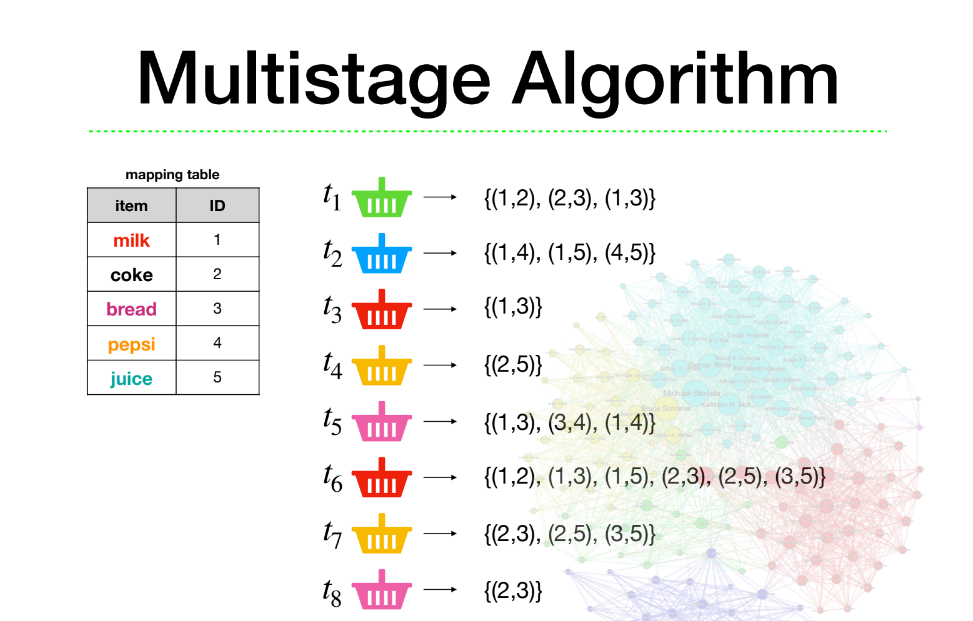

In [8]:
data['Item_mapping'] = data['Item'].apply(lambda item: items_mapping[item])
data.head()

,Member_id,Date,Item,Item_mapping
0,1808,21-07-2015,tropical fruit,156
1,2552,05-01-2015,whole milk,164
2,2300,19-09-2015,pip fruit,109
3,1187,12-12-2015,other vegetables,102
4,3037,01-02-2015,whole milk,164


In [9]:
transactions = data.groupby('Member_id')['Item_mapping'].apply(list).to_frame()
transactions

,Item_mapping
Member_id,
1000,"[138, 20, 130, 130, 164, 164, 108, 92, 132, 73..."
1001,"[56, 56, 8, 130, 164, 138, 40, 162, 164, 138, ..."
1002,"[156, 16, 15, 63, 150, 145, 164, 102]"
1003,"[130, 123, 122, 45, 61, 122, 43, 122]"
1004,"[102, 109, 123, 20, 122, 164, 102, 73, 164, 16..."
...,...
4996,"[44, 128, 122, 92, 11, 156, 12, 42, 132, 138]"
4997,"[156, 163, 164, 40, 65, 20]"
4998,"[122, 40]"


Посчитаем частоту покупаемости каждого товара. И отберём среди них те, которые прошли (`singletons`) уровень поддержки = 800 и не прошли (`unsopporteds`).

In [10]:
item_counts = data['Item_mapping'].value_counts()

singletons = item_counts[item_counts >= support_s]
unsupporteds = item_counts[item_counts < support_s]

In [11]:
singletons

164    2502
102    1898
122    1716
138    1514
165    1334
123    1071
156    1032
12      933
130     924
30      812
Name: Item_mapping, dtype: int64

Составим попарные сочетания для товаров каждой корзины покупателей.

In [12]:
doubletons = data.groupby('Member_id')['Item_mapping'] \
                 .apply(lambda items: list(combinations(items, 2))) \
                 .to_frame(name='Item_combinations')
doubletons

,Item_combinations
Member_id,
1000,"[(138, 20), (138, 130), (138, 130), (138, 164)..."
1001,"[(56, 56), (56, 8), (56, 130), (56, 164), (56,..."
1002,"[(156, 16), (156, 15), (156, 63), (156, 150), ..."
1003,"[(130, 123), (130, 122), (130, 45), (130, 61),..."
1004,"[(102, 109), (102, 123), (102, 20), (102, 122)..."
...,...
4996,"[(44, 128), (44, 122), (44, 92), (44, 11), (44..."
4997,"[(156, 163), (156, 164), (156, 40), (156, 65),..."
4998,"[(122, 40)]"


Определим хеш-функции.

In [13]:
k = len(items)

def hash_pair1(pair, k=len(items)):
    return (pair[0] + pair[1]) % k


def hash_pair2(pair, k=len(items)):
    return (pair[0] + 2 * pair[1]) % k

Посчитаем хеши для комбинаций пар товаров каждой корзины и сформируем `Hash-buckets`. 

Значения хеша пары товаров будет являться индексом пары в таблице Hash-buckets.

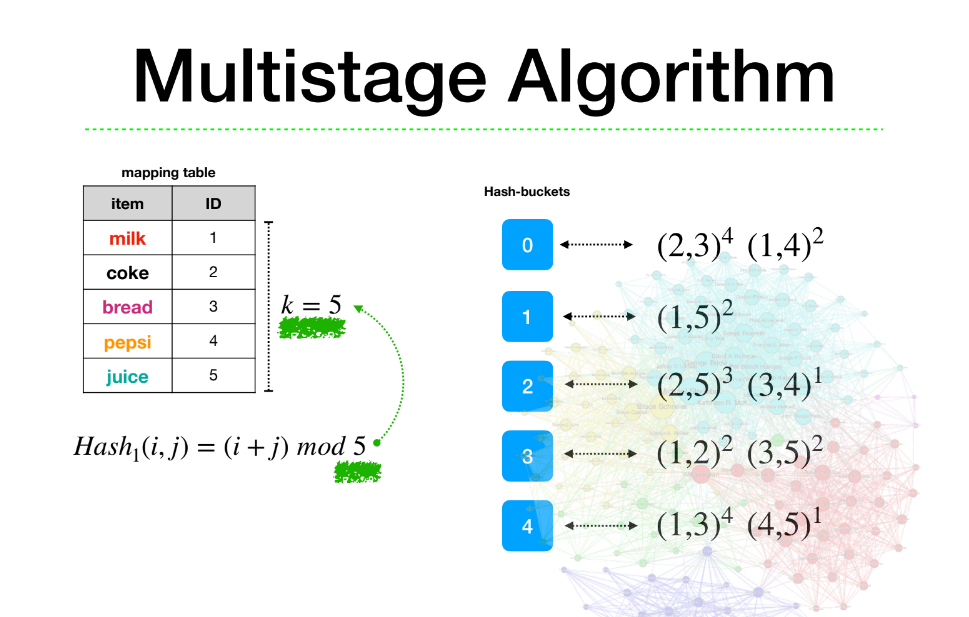

Развернём список всех пар покупок в один плоский список `all_pairs`.

In [14]:
all_pairs = sum(([x for x in doubletons['Item_combinations']]), [])
len(all_pairs)

228330

Сформируем `Hash-buckets`.

In [15]:
hash_buckets1 = [[] for _ in range(k)]

for pair in all_pairs:
    hash_buckets1[hash_pair1(pair)].append(pair)

In [16]:
pd.Series(hash_buckets1).to_frame('Hash_bucket')

,Hash_bucket
0,"[(122, 45), (45, 122), (45, 122), (27, 140), (..."
1,"[(8, 160), (123, 45), (109, 59), (122, 46), (4..."
2,"[(123, 46), (34, 135), (160, 9), (9, 160), (9,..."
3,"[(8, 162), (130, 40), (65, 105), (156, 14), (4..."
4,"[(156, 15), (56, 115), (69, 102), (6, 165), (1..."
...,...
162,"[(164, 165), (164, 165), (40, 122), (59, 103),..."
163,"[(165, 165), (165, 165), (41, 122), (61, 102),..."
164,"[(59, 105), (103, 61), (164, 0), (0, 164), (70..."
165,"[(92, 73), (15, 150), (63, 102), (122, 43), (1..."


In [17]:
unsupported_pairs1 = []

for group in hash_buckets1:
    if len(group) < support_s:
        for p in group:
            unsupported_pairs1.append(p)

In [18]:
hash_buckets2 = [[] for _ in range(k)]

for pair in all_pairs:
    hash_buckets2[hash_pair2(pair)].append(pair)

In [19]:
pd.Series(hash_buckets2).to_frame('Hash_bucket')

,Hash_bucket
0,"[(45, 61), (103, 32), (156, 89), (69, 49), (12..."
1,"[(56, 56), (56, 56), (12, 78), (12, 78), (93, ..."
2,"[(8, 164), (8, 164), (160, 88), (56, 140), (56..."
3,"[(123, 107), (30, 70), (119, 109), (130, 20), ..."
4,"[(83, 44), (105, 33), (41, 65), (160, 89), (14..."
...,...
162,"[(73, 128), (123, 103), (119, 105), (56, 53), ..."
163,"[(123, 20), (84, 123), (133, 15), (123, 20), (..."
164,"[(11, 160), (87, 122), (140, 12), (109, 111), ..."
165,"[(56, 138), (56, 138), (56, 138), (56, 138), (..."


In [20]:
for i in range(len(hash_buckets2)):
    for p in unsupported_pairs1:
        if p in hash_buckets2[i]:
            hash_buckets2[i].remove(p)
            
for group in hash_buckets2:
    if len(group) < support_s:
        hash_buckets2.remove(group)

In [21]:
frequent_doubletons = []
for group in hash_buckets2:
    for p in group:
        print(p)
        item1 = items_inv_mapping[p[0] - 1]
        item2 = items_inv_mapping[p[1] - 1]
        
        if item1 not in unsupporteds and item2 not in unsupporteds and item1 != item2:
            frequent_doubletons.append((items_mapping[item1], items_mapping[item2]))

(45, 61)
(103, 32)
(156, 89)
(69, 49)
(122, 106)
(160, 87)
(87, 40)
(133, 17)
(73, 47)
(68, 133)
(68, 133)
(68, 133)
(68, 133)
(56, 139)
(68, 133)
(107, 30)
(130, 102)
(130, 102)
(164, 85)
(164, 85)
(164, 85)
(164, 85)
(111, 28)
(77, 45)
(130, 102)
(130, 102)
(10, 162)
(10, 162)
(69, 49)
(74, 130)
(130, 102)
(130, 102)
(143, 12)
(130, 102)
(130, 102)
(133, 17)
(133, 17)
(14, 160)
(27, 70)
(14, 160)
(138, 98)
(164, 85)
(94, 120)
(130, 102)
(138, 98)
(138, 98)
(138, 98)
(69, 49)
(69, 49)
(88, 123)
(130, 102)
(130, 102)
(164, 85)
(56, 139)
(130, 102)
(111, 28)
(164, 85)
(111, 28)
(30, 152)
(68, 133)
(8, 163)
(138, 98)
(69, 49)
(68, 133)
(68, 133)
(130, 102)
(130, 102)
(14, 160)
(10, 162)
(138, 98)
(98, 118)
(130, 102)
(130, 102)
(164, 85)
(146, 94)
(90, 122)
(90, 122)
(94, 120)
(99, 34)
(69, 49)
(16, 159)
(130, 102)
(130, 102)
(130, 102)
(130, 102)
(10, 162)
(14, 160)
(130, 102)
(138, 98)
(164, 85)
(130, 102)
(130, 102)
(165, 1)
(130, 102)
(68, 133)
(64, 135)
(69, 49)
(143, 12)
(156, 89)


(127, 20)
(10, 162)
(49, 59)
(88, 123)
(123, 22)
(130, 102)
(130, 102)
(111, 28)
(130, 102)
(10, 162)
(156, 89)
(156, 89)
(138, 98)
(130, 102)
(130, 102)
(130, 102)
(164, 85)
(164, 85)
(164, 85)
(69, 49)
(8, 163)
(64, 135)
(68, 133)
(94, 120)
(88, 123)
(103, 32)
(19, 74)
(164, 85)
(164, 85)
(150, 92)
(15, 76)
(158, 88)
(144, 95)
(165, 1)
(139, 14)
(29, 69)
(111, 28)
(130, 102)
(164, 85)
(164, 85)
(130, 102)
(14, 160)
(95, 36)
(14, 160)
(111, 28)
(107, 30)
(32, 151)
(130, 102)
(130, 102)
(165, 1)
(130, 102)
(156, 89)
(156, 89)
(130, 102)
(122, 106)
(130, 102)
(14, 160)
(133, 17)
(69, 49)
(99, 34)
(130, 102)
(130, 102)
(119, 24)
(139, 14)
(68, 133)
(94, 120)
(27, 70)
(130, 102)
(68, 133)
(16, 159)
(88, 123)
(133, 17)
(6, 164)
(6, 164)
(164, 85)
(62, 136)
(130, 102)
(20, 157)
(56, 139)
(90, 122)
(21, 73)
(130, 102)
(127, 20)
(90, 122)
(68, 133)
(139, 14)
(143, 12)
(164, 85)
(27, 70)
(27, 70)
(165, 1)
(165, 1)
(165, 1)
(130, 102)
(165, 1)
(130, 102)
(130, 102)
(130, 102)
(138, 98)
(90, 122

KeyError: -1

In [26]:
[(items_inv_mapping[pair[0]], items_inv_mapping[pair[1]]) 
 for pair in set(frequent_doubletons)]

[('ham', 'semi-finished bread'),
 ('pet care', 'chocolate marshmallow'),
 ('butter', 'vinegar'),
 ('pickled vegetables', 'pot plants'),
 ('red/blush wine', 'canned vegetables'),
 ('rice', 'canned fruit'),
 ('whole milk', 'Instant food products'),
 ('hamburger meat', 'dog food'),
 ('organic sausage', 'processed cheese'),
 ('candy', 'hygiene articles'),
 ('sauces', 'candles'),
 ('sausage', 'cake bar'),
 ('white wine', 'liver loaf'),
 ('hair spray', 'shopping bags'),
 ('brown bread', 'waffles'),
 ('pork', 'popcorn'),
 ('chewing gum', 'hard cheese'),
 ('chocolate marshmallow', 'hamburger meat'),
 ('house keeping products', 'sausage'),
 ('processed cheese', 'cereals'),
 ('margarine', 'cream'),
 ('roll products ', 'pastry'),
 ('cereals', 'tea'),
 ('hard cheese', 'seasonal products'),
 ('cleaner', 'sugar'),
 ('hygiene articles', 'dish cleaner'),
 ('coffee', 'spread cheese'),
 ('dish cleaner', 'frozen fish'),
 ('semi-finished bread', 'butter milk'),
 ('hamburger meat', 'semi-finished bread'),
